In [ ]:
prefix = 'case2_'
path = 'https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/'
sufix = '?raw=true'

# **BIBLIOTECAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('ggplot')
# PROCESSAMENTO
from sklearn.preprocessing import *
from sklearn.metrics import *
# MODELOS
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import seaborn as sns
import scipy

# EXPORTAÇÃO / IMPORTAÇÃO
# Lib para exportar scalers
# https://scikit-learn.org/stable/modules/model_persistence.html
from joblib import dump, load

# Lib para exportar numpy ou arrays
# https://www.christopherlovell.co.uk/blog/2016/04/27/h5py-intro.html
import h5py

# IMPORTAÇÃO DOS DADOS

## Teste de indexação e inclusão de features em um dataframe com as métricas das avaliações.

In [ ]:
df_models_metrics = pd.DataFrame(columns=['MODELO','TOTAL_CONSUMIDAS','TOTAL_PREVISTAS','ERRO_TOTAL_PREVISAO','ERRO_TOTAL_PERC_PREVISAO', 'CORRELACAO', 'pi', 'RMSE', 'TOTAL_FALTA', 'TOTAL_DESCARTE', 'ERRO_ABS_MEDIANO' , 'ERRO_ABSOLUTO_PERCENTUAL_MEDIO'])
df_models_metrics

,MODELO,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO


In [ ]:
df_models_metrics = df_models_metrics.set_index('MODELO')
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,


In [ ]:
new_row = pd.Series(data={ 'TOTAL_CONSUMIDAS':87, 
           'TOTAL_PREVISTAS':92, 
           'ERRO_TOTAL_PREVISAO':97,
           'ERRO_TOTAL_PERC_PREVISAO':100,
           'CORRELACAO':97, 
           'pi':97, 
           'RMSE':97, 
           'TOTAL_FALTA':97, 
           'TOTAL_DESCARTE':97, 
           'ERRO_ABS_MEDIANO':97, 
           'ERRO_ABSOLUTO_PERCENTUAL_MEDIO':97}, 
           name = 'dummy')
df_models_metrics = df_models_metrics.append(new_row, ignore_index=False)
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,
dummy,87,92,97,100,97,97,97,97,97,97,97


In [ ]:
df_models_metrics.drop('dummy', inplace = True)
df_models_metrics

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,


## **case2_** CONJUNTO DE TESTE = 2019-01-01 À 2019-07-31

In [ ]:
df_test = pd.read_pickle("https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_df_test.pkl?raw=true")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2019-02-20 to 2019-07-05
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEMESTRE_1                88 non-null     int64  
 1   SEMESTRE_2                88 non-null     int64  
 2   SEGUNDA                   88 non-null     int64  
 3   TERCA                     88 non-null     int64  
 4   QUARTA                    88 non-null     int64  
 5   QUINTA                    88 non-null     int64  
 6   SEXTA                     88 non-null     int64  
 7   DISTANCIA_DIA_ANTERIOR    88 non-null     int64  
 8   DISTANCIA_DIA_POSTERIOR   88 non-null     int64  
 9   PERC_CONCLUSAO_SEM        88 non-null     float64
 10  PERC_CONCLUSAO_MES        88 non-null     float64
 11  PRESSAO_ATMOSFERICA       88 non-null     float64
 12  TEMPERATURA               88 non-null     float64
 13  UMIDADE                   88 non-null     int64

In [ ]:
df_test.head()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,75.288422,85.317772,85.317772,98.984299,145.950943,182.250366,387.503998,345.411926
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,523.388794,202.882233,202.882233,474.870453,586.287476,243.321457,388.437286,238.454773
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,398.292175,289.051147,289.051147,363.845734,420.163635,280.444153,348.338806,283.864624
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,329.883972,292.395569,292.395569,296.073853,342.848694,220.567719,226.436798,311.131470
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,365.316162,328.533295,328.533295,426.545074,507.593719,286.661072,258.375458,318.834534


In [ ]:
df_test.tail()

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,1,0,1,0,0,0,0,3,1,96.35,3.23,952.2,18.8,74,0.6,80,111,376,348,442,632,94,196,259,266,438,385,23,20,120,129,146,157,500,204,218.881180,261.537384,261.537384,197.936646,233.810928,223.693253,230.292511,341.280792
2019-07-02,1,0,0,1,0,0,0,1,1,97.08,6.45,947.6,17.3,78,1.0,113,80,111,376,348,442,116,94,196,259,266,438,35,23,20,120,129,146,569,189,196.031769,224.775909,224.775909,194.300781,125.703171,208.172302,178.844284,313.745209
2019-07-03,1,0,0,0,1,0,0,1,1,97.81,9.68,946.0,16.9,82,0.5,62,113,80,111,376,348,80,116,94,196,259,266,43,35,23,20,120,129,345,167,187.817642,172.214081,172.214081,151.184082,137.527145,190.134674,156.752350,295.456299
2019-07-04,1,0,0,0,0,1,0,1,1,98.54,12.90,948.3,18.4,92,0.7,60,62,113,80,111,376,65,80,116,94,196,259,7,43,35,23,20,120,336,156,142.221603,144.611160,144.611160,54.052692,37.999619,203.045837,174.423935,277.832916
2019-07-05,1,0,0,0,0,0,1,1,31,99.27,16.13,949.5,15.6,94,3.0,19,60,62,113,80,111,26,65,80,116,94,196,4,7,43,35,23,20,254,26,139.805481,122.705025,122.705025,73.138626,94.952332,171.668396,18.642702,225.450211


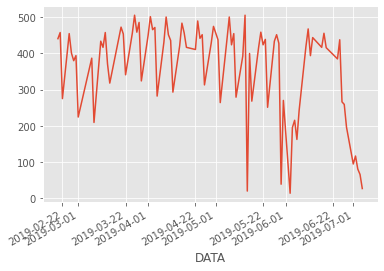

In [ ]:
df_test['ENTR_ALMOCO'].plot()

## NP ARRAYS ESCALADOS E FORMATADOS PARA ENTRADA DOS MODELOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_np_data.h5?raw=true

--2020-09-26 23:11:59--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_np_data.h5?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_np_data.h5 [following]
--2020-09-26 23:11:59--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_np_data.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_np_data.h5 [following]
--2020-09-26 23:11:59--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_np_data.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.1

In [ ]:
hf = h5py.File('./case2_np_data.h5?raw=true', 'r')
hf.keys()

<KeysViewHDF5 ['scaled_test_x', 'scaled_test_y', 'scaled_train_x', 'scaled_train_y', 'scaled_val_x', 'scaled_val_y', 'test_x_dense', 'train_x_dense', 'val_x_dense']>

In [ ]:
# Dados Recorrentes(temporais), escalados
scaled_recurrent_train_x = np.array(hf.get('scaled_train_x'))
scaled_recurrent_val_x = np.array(hf.get('scaled_val_x'))
scaled_recurrent_test_x = np.array(hf.get('scaled_test_x'))

# Dados Categóricos (dias da semana e semestre já escalados no df original)
# concatenados com Dados Pontuais (climáticos) escalados
scaled_discrete_train_x = np.array(hf.get('train_x_dense'))
scaled_discrete_val_x = np.array(hf.get('val_x_dense'))
scaled_discrete_test_x = np.array(hf.get('test_x_dense'))

# Valores de supervisão (saída) de cada dataframe, escalados
scaled_train_y = np.array(hf.get('scaled_train_y'))
scaled_val_y = np.array(hf.get('scaled_val_y'))
scaled_test_y = np.array(hf.get('scaled_test_y'))

In [ ]:
hf.close()

## Importando Scalers para transformar a saída em valores reais.

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_scaler_numpont.joblib?raw=true

--2020-09-26 23:11:59--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_scaler_numpont.joblib?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_scaler_numpont.joblib [following]
--2020-09-26 23:12:00--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_scaler_numpont.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_scaler_numpont.joblib [following]
--2020-09-26 23:12:00--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_scaler_numpont.joblib
Resolving raw.githubusercontent.com (raw.githubuserc

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_rnn_scalers_arr.joblib?raw=true

--2020-09-26 23:12:00--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_rnn_scalers_arr.joblib?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_rnn_scalers_arr.joblib [following]
--2020-09-26 23:12:00--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_rnn_scalers_arr.joblib
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_rnn_scalers_arr.joblib [following]
--2020-09-26 23:12:00--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_rnn_scalers_arr.joblib
Resolving raw.githubusercontent.com (raw.github

In [ ]:
num_temporais = 3 #ENTR_ALMOCO, VENDAS_ALMOCO, ENTR_JANTAR
discrete_scaler = MinMaxScaler([0,1])
discrete_scaler = load('./case2_scaler_numpont.joblib?raw=true')

recurrent_scalers = [MinMaxScaler([0,1]) for i in range(num_temporais)]
recurrent_scalers = load('./case2_rnn_scalers_arr.joblib?raw=true')

# **FUNÇÕES DE AVALIAÇÃO DOS MODELOS**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true = np.maximum(y_true, 1e-7)  # Prevent division by zero
  return 100. * np.mean(np.abs((y_true - y_pred) / y_true))

def metricas_predicoes(_df_true,_predStr,_df_models_metrics):
  m_df_models_metrics = pd.DataFrame()
  m_df_models_metrics = _df_models_metrics
  df = pd.DataFrame()
  df = _df_true

  arr_true = df['ENTR_ALMOCO']
  sum_true = np.sum(arr_true)
  len_true = len(arr_true)

  arr_pred = df[_predStr]
  sum_pred = np.sum(arr_pred)
  len_pred = len(arr_pred)

  diff_pred = sum_pred - sum_true
  perc_diff_pred = (diff_pred / max(1e-7,sum_true)) * 100

  arr_e = arr_true - arr_pred

  print("TOTAL DE REFEIÇÕES CONSUMIDAS = " + str(sum_true) + " : " + str(len_true) + " linhas")
  print("TOTAL DE REFEIÇÕES PROJETADAS = " + str(sum_pred) + " : " + str(len_pred) + " linhas")
  print("ERRO DE PREVISÃO = " + str(diff_pred) + " " + str(perc_diff_pred) + " % do total consumido")

  m_r, m_p = scipy.stats.pearsonr(arr_true, arr_pred)
  print("CORRELAÇÃO (r): " + str(m_r) + " Pi (p) :" + str(m_p))
  sns.regplot(x=arr_true,y=arr_pred,data=df)

  rmse = mean_squared_error(arr_true, arr_pred, squared=False)
  print("RMSE = " + str(rmse))

  m_mae = np.median(np.abs(arr_e))
  m_mape = mean_absolute_percentage_error(arr_true,arr_pred)

  subpredictions = sum(i for i in arr_e if i < 0)
  superpredictions = sum(i for i in arr_e if i >= 0)

  print("TOTAL DE REFEIÇÕES SUB PROJETADAS = " + str(subpredictions))
  print("TOTAL DE REFEIÇÕES SUPER PROJETADAS = " + str(superpredictions))
  print("ERRO ABSOLUTO MEDIANO = " + str(m_mae))
  print("ERRO ABSOLUTO PERCENTUAL MEDIO = " + str(m_mape)+"%")
  plt.figure(figsize=(30,5))
  df['ENTR_ALMOCO'].plot( linewidth=1.5, color='red', label = 'ALMOÇO REAL')
  df[_predStr].plot( linewidth=2.5, color='blue', label = 'ALMOÇO PREVISTO')
  plt.legend()
  plt.xlabel("Index", labelpad=15)
  plt.show()
  #['MODELO','TOTAL_CONSUMIDAS','TOTAL_PROJETADAS','ERRO_PROJECAO', 'CORRELACAO', 'pi', 'RMSE', 'TOTAL SUBPROJETADO', 'TOTAL SUPER PROJETADO ', 'ERRO ABS MEDIANO' , 'ERRO ABSOLUTO PERCENTUAL MEDIO']
  new_row = pd.Series(data={ 'TOTAL_CONSUMIDAS':sum_true, 
          'TOTAL_PREVISTAS':sum_pred, 
          'ERRO_TOTAL_PREVISAO':diff_pred,
          'ERRO_TOTAL_PERC_PREVISAO':perc_diff_pred,
          'CORRELACAO':m_r, 
          'pi':m_p, 
          'RMSE':rmse, 
          'TOTAL_FALTA':subpredictions, 
          'TOTAL_DESCARTE':superpredictions, 
          'ERRO_ABS_MEDIANO':m_mae, 
          'ERRO_ABSOLUTO_PERCENTUAL_MEDIO':m_mape}, 
          name = _predStr)
  m_df_models_metrics = m_df_models_metrics.append(new_row, ignore_index=False)
  return m_df_models_metrics

# **PREVISÕES**

## IMPORTAÇÃO DOS MODELOS ENDÓGENOS

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_MLP_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_1_NEW_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_ENDO_2_validated.h5?raw=true

--2020-09-26 23:12:01--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_MLP_ENDO_1_validated.h5?raw=true
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_MLP_ENDO_1_validated.h5 [following]
--2020-09-26 23:12:01--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_MLP_ENDO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_MLP_ENDO_1_validated.h5 [following]
--2020-09-26 23:12:01--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_MLP_ENDO_1_validated.h5
Resolving raw.githubusercontent.com (raw.g

case2_MLP_ENDO_2_validated.h5

case2_RNN_ENDO_2_validated.h5

case2_RNN_ENDO_2_NEW_validated.h5

case2_RNN_ENDO_2_validated.h5

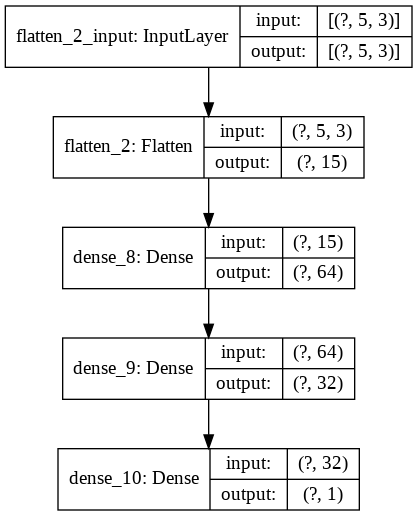

In [ ]:
MLP_ENDO_1 = keras.models.Sequential()
MLP_ENDO_1 = keras.models.load_model('/content/case2_MLP_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(MLP_ENDO_1, show_shapes=True)

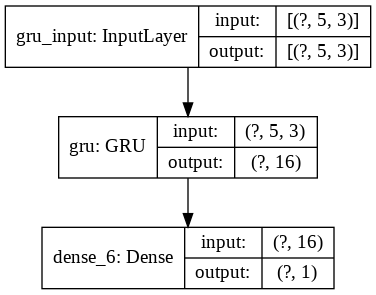

In [ ]:
RNN_ENDO_1 = keras.models.Sequential()
RNN_ENDO_1 = keras.models.load_model('/content/case2_RNN_ENDO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

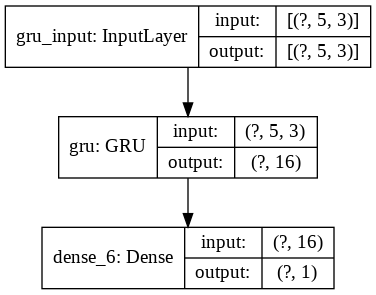

In [ ]:
RNN_ENDO_1_NEW = keras.models.Sequential()
RNN_ENDO_1_NEW = keras.models.load_model('/content/case2_RNN_ENDO_1_NEW_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

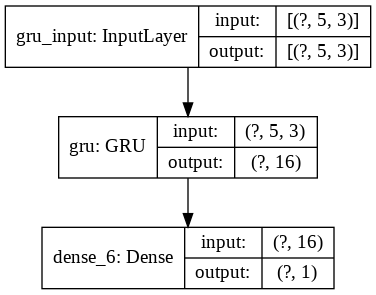

In [ ]:
RNN_ENDO_2 = keras.models.Sequential()
RNN_ENDO_2 = keras.models.load_model('/content/case2_RNN_ENDO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_ENDO_1, show_shapes=True)

### PREDIÇÕES COM OS MODELOS ENDOGENOS COM OS MENORES RMSE NA FASE EXPERIMENTAL

#### RNN_ENDO_2

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 31465.61 : 88 linhas
ERRO DE PREVISÃO = 0 0.0 % do total consumido
CORRELAÇÃO (r): 0.595439952619013 Pi (p) :9.422107922632693e-10
RMSE = 108.0662937716224
TOTAL DE REFEIÇÕES SUB PROJETADAS = -2982.5679626464844
TOTAL DE REFEIÇÕES SUPER PROJETADAS = 3478.9568843841553
ERRO ABSOLUTO MEDIANO = 46.70722198486328
ERRO ABSOLUTO PERCENTUAL MEDIO = 74.93538520904963%


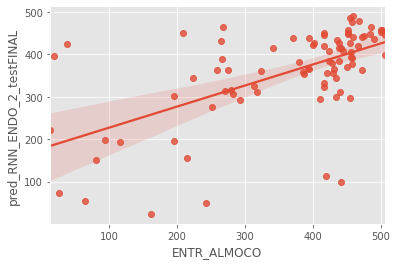

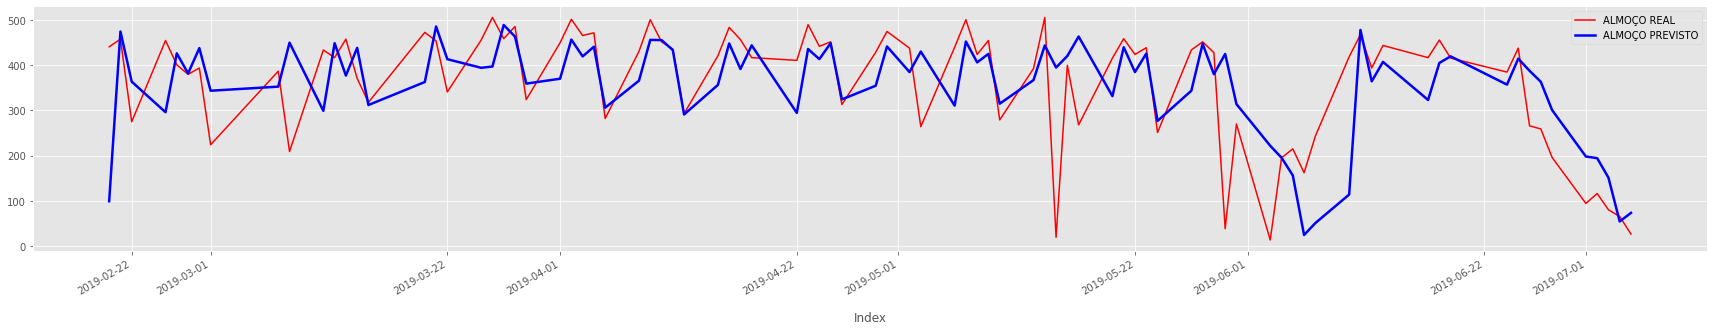

In [ ]:
#RNN_ENDO_2
model_name = 'RNN_ENDO_2'
model = RNN_ENDO_2
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

reg = 'pred_' + model_name + '_testFINAL'
df_test[reg] = pred_y
df_models_metrics = metricas_predicoes(df_test, reg,df_models_metrics)

In [ ]:
RNN_ENDO_2.layers[0].get_weights()

[array([[-1.2745845 ,  0.50217354, -0.20231795,  0.61972594,  0.03424351,
          0.16226064, -0.36317348, -0.30333734, -1.0562097 , -0.30572727,
         -0.1919477 , -0.75428104, -0.31313878,  1.587495  , -0.28858793,
          0.48610547, -0.39271268, -0.37669665,  0.39382398, -0.73835796,
         -0.44887704, -0.31196854, -0.18076909,  0.3145501 , -0.31914234,
         -0.01789545,  0.20716973, -0.27468917, -0.76373875, -0.46691644,
         -0.46834525, -0.24819863,  0.4138915 ,  0.33768058,  0.19773336,
         -0.33276132,  0.06928576,  0.35130292,  0.09537978,  0.23581229,
          0.36308438,  0.01324982, -0.27142423,  0.13478303, -0.19389676,
          0.25593555, -0.47013643,  0.40054038],
        [-0.6299222 , -1.4740534 , -0.05932747, -0.28406602, -0.06707082,
         -1.096821  , -1.3010174 , -0.74709755, -0.95971894, -0.03142126,
         -1.1177245 , -0.5851001 , -0.6918407 ,  1.171075  ,  1.708092  ,
          0.07492495,  0.01555314, -1.0221816 ,  0.4531837 , -0

In [ ]:
df_test['2019-05-10':'2019-06-10']['ENTR_ALMOCO']

DATA
2019-05-10    279
2019-05-13    393
2019-05-14    506
2019-05-15     19
2019-05-16    400
2019-05-17    268
2019-05-20    416
2019-05-21    459
2019-05-22    424
2019-05-23    439
2019-05-24    251
2019-05-27    434
2019-05-28    452
2019-05-29    428
2019-05-30     38
2019-05-31    270
2019-06-03     13
2019-06-04    195
2019-06-05    215
2019-06-06    162
2019-06-07    243
2019-06-10    419
Name: ENTR_ALMOCO, dtype: int64

In [ ]:
df_test['2019-03-01':'2019-03-10']['ENTR_ALMOCO']

DATA
2019-03-01    224
2019-03-07    387
2019-03-08    209
Name: ENTR_ALMOCO, dtype: int64

#### DATAS OUTLIERS

ANOMALIA: 
2019-03-08 --- 209 (SEXTA - FEIRA, NA SEMANA TEVE FERIADO NA TERÇA DIA 05, INICIO DO SEMESTRE)

OUTLIERS:
2019-05-15 --- 19 (PARALIZAÇÃO)

2019-05-30 --- 38 (PARALIZAÇÃO)

2019-06-03 --- 13

#### MLP_ENDO_2

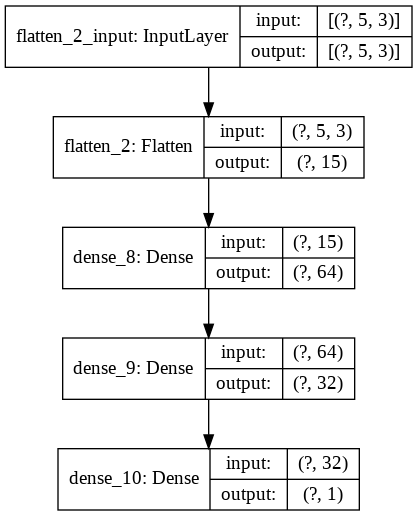

In [ ]:
keras.utils.plot_model(MLP_ENDO_1, show_shapes=True)

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 32369.654 : 88 linhas
ERRO DE PREVISÃO = 0 0.0 % do total consumido
CORRELAÇÃO (r): 0.5212411595055804 Pi (p) :1.9211578801789243e-07
RMSE = 128.05415989336365
TOTAL DE REFEIÇÕES SUB PROJETADAS = -4305.512283325195
TOTAL DE REFEIÇÕES SUPER PROJETADAS = 3897.856979370117
ERRO ABSOLUTO MEDIANO = 71.89505004882812
ERRO ABSOLUTO PERCENTUAL MEDIO = 92.58158195406224%


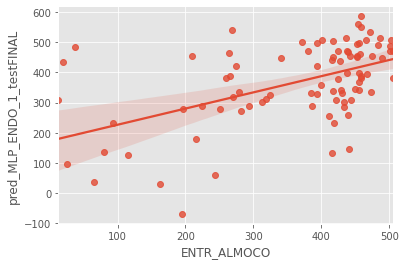

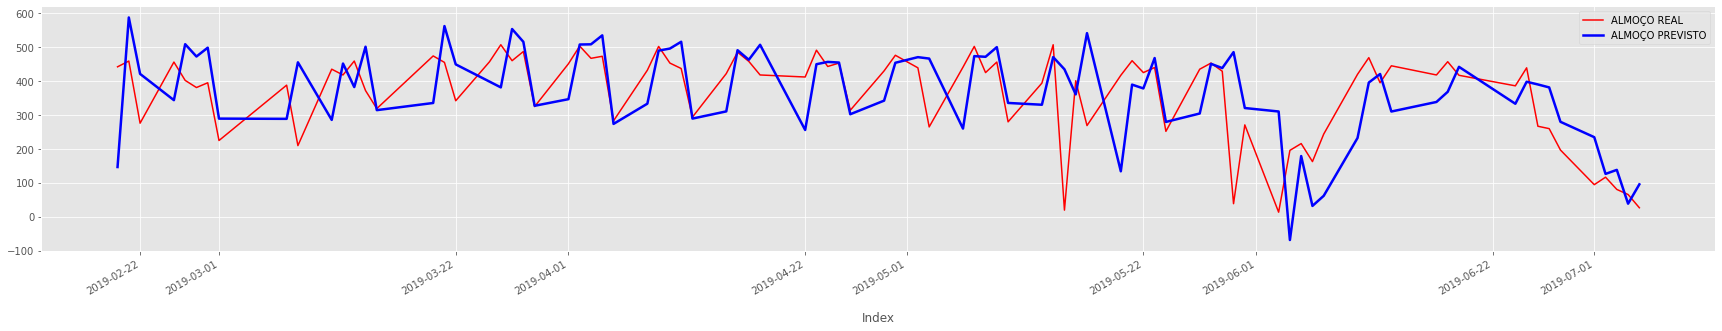

In [ ]:
model_name = 'MLP_ENDO_1'
model = MLP_ENDO_1
x_test = scaled_recurrent_test_x
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y) # 0 = ENTR_ALMOCO

reg = 'pred_' + model_name + '_testFINAL'
df_test[reg] = pred_y
df_models_metrics = metricas_predicoes(df_test, reg , df_models_metrics)

In [ ]:
MLP_ENDO_1.layers[1].get_weights()

[array([[-1.38481125e-01, -1.59126863e-01, -8.73689204e-02,
         -2.39390656e-01,  5.33496626e-02,  2.26480380e-01,
          1.57737777e-01,  1.87777415e-01,  1.60177380e-01,
          2.47795835e-01, -6.79058656e-02,  8.88815373e-02,
          3.17685604e-01, -8.44842046e-02, -6.41505867e-02,
          1.37901381e-01, -5.31496294e-02, -2.23153949e-01,
          4.82295118e-02,  1.37773957e-02, -4.74635251e-02,
          3.39837745e-02, -1.12744078e-01, -7.03840405e-02,
          1.67972267e-01, -2.76180267e-01,  1.50366649e-01,
          2.71348923e-01, -1.81591604e-02, -4.25054953e-02,
          1.06189959e-01, -1.98152125e-01,  7.75217637e-03,
          1.28779411e-01,  9.16294381e-02, -4.18296782e-03,
          4.35240045e-02,  7.64538348e-02, -1.39213935e-01,
         -2.36723244e-01, -8.82610157e-02, -5.86637519e-02,
          1.70157596e-01,  2.24821404e-01,  2.72037946e-02,
          1.67017236e-01, -9.63926092e-02,  2.58315802e-01,
         -1.07562300e-02, -2.58608907e-0

## IMPORTAÇÃO DOS MODELOS MISTOS (ENDÓGENOS E EXÓGENOS)

In [ ]:
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_1_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_2_validated.h5?raw=true
!wget https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case2_RNN_EXO_3_validated.h5?raw=true

--2020-09-26 23:12:07--  https://github.com/ddlandim/monografy-ann-demand-prediction/blob/master/Models/case1_RNN_EXO_1_validated.h5?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_RNN_EXO_1_validated.h5 [following]
--2020-09-26 23:12:07--  https://github.com/ddlandim/monografy-ann-demand-prediction/raw/master/Models/case1_RNN_EXO_1_validated.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_RNN_EXO_1_validated.h5 [following]
--2020-09-26 23:12:08--  https://raw.githubusercontent.com/ddlandim/monografy-ann-demand-prediction/master/Models/case1_RNN_EXO_1_validated.h5
Resolving raw.githubusercontent.com (raw.github

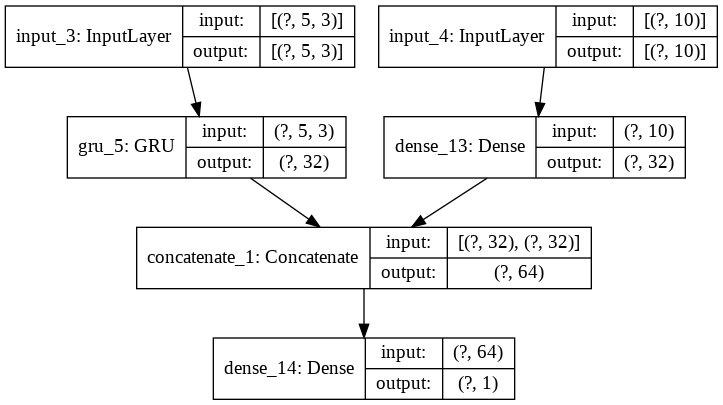

In [ ]:
RNN_EXO_1 = keras.models.Sequential()
RNN_EXO_1 = keras.models.load_model('/content/case2_RNN_EXO_1_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_1, show_shapes=True)

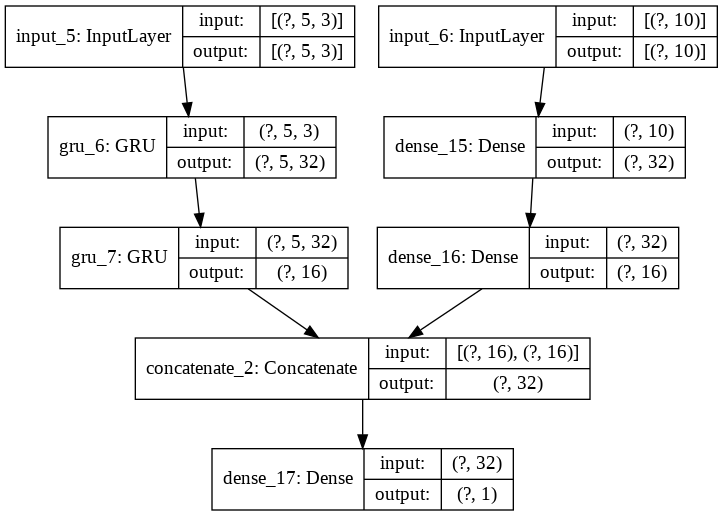

In [ ]:
RNN_EXO_2 = keras.models.Sequential()
RNN_EXO_2 = keras.models.load_model('/content/case2_RNN_EXO_2_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_2, show_shapes=True)

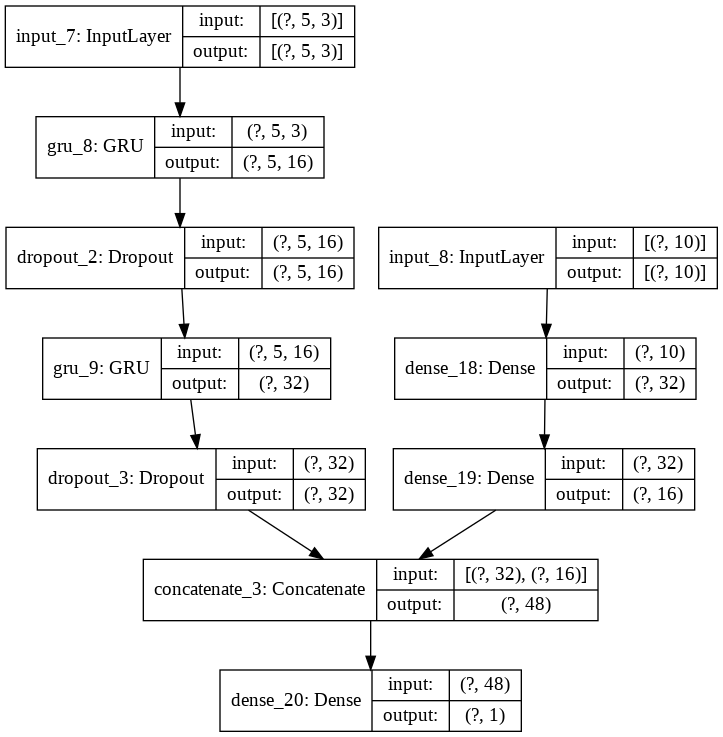

In [ ]:
RNN_EXO_3 = keras.models.Sequential()
RNN_EXO_3 = keras.models.load_model('/content/case2_RNN_EXO_3_validated.h5?raw=true')
keras.utils.plot_model(RNN_EXO_3, show_shapes=True)

### PREDIÇÃO COM O MODELO MISTO COM O MENOR ERRO ABS MEDIO NA FASE EXPERIMENTAL

#### **RNN_EXO_2**

TOTAL DE REFEIÇÕES CONSUMIDAS = 31962 : 88 linhas
TOTAL DE REFEIÇÕES PROJETADAS = 30823.148 : 88 linhas
ERRO DE PREVISÃO = 0 0.0 % do total consumido
CORRELAÇÃO (r): 0.5206433612135913 Pi (p) :1.9952084202515358e-07
RMSE = 112.99211377165491
TOTAL DE REFEIÇÕES SUB PROJETADAS = -3044.8834533691406
TOTAL DE REFEIÇÕES SUPER PROJETADAS = 4183.734128952026
ERRO ABSOLUTO MEDIANO = 63.59894561767578
ERRO ABSOLUTO PERCENTUAL MEDIO = 88.26875085831726%


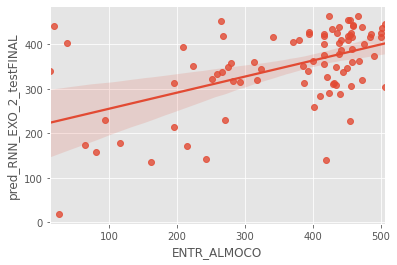

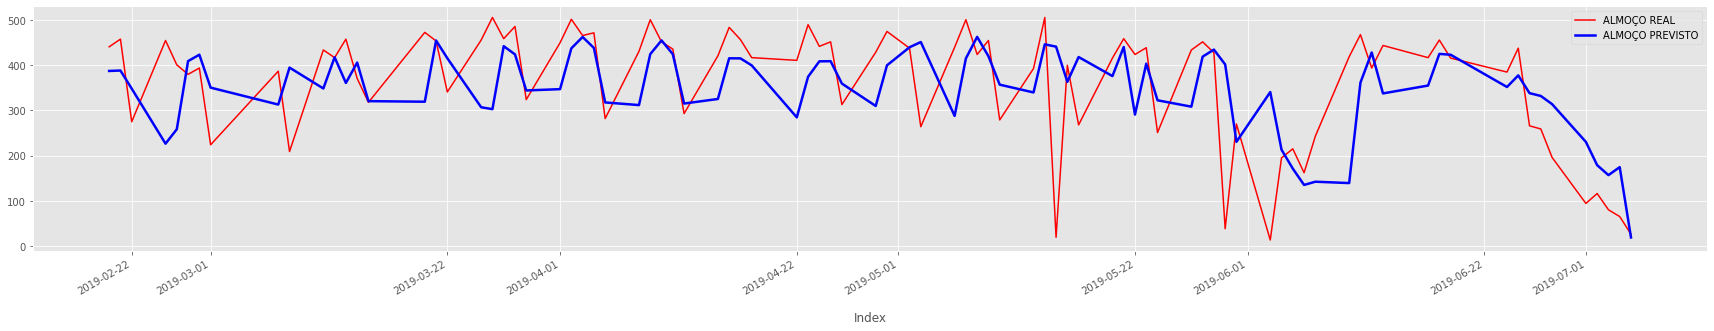

In [ ]:
#RNN_EXO_2
model_name = 'RNN_EXO_2'
model = RNN_EXO_2
x_test = (scaled_recurrent_test_x, scaled_discrete_test_x)
pred_y = model.predict(x_test)
# retorna os valores a escala normal do problema
pred_y = recurrent_scalers[0].inverse_transform(pred_y)

reg = 'pred_' + model_name + '_testFINAL'
df_test[reg] = pred_y
df_models_metrics = metricas_predicoes(df_test, reg , df_models_metrics)

In [ ]:
RNN_EXO_2.get_weights()

[array([[ 2.38510400e-01, -2.68355489e-01, -2.65987992e-01,
          7.90596604e-02, -3.12755257e-02, -7.24247098e-02,
         -1.74906597e-01, -1.31450891e-01, -6.98916093e-02,
         -2.95824438e-01, -4.53065693e-01,  1.04567140e-01,
         -2.97546566e-01, -2.47707605e-01,  8.90834183e-02,
          4.68435138e-02,  3.37012038e-02,  2.64133155e-01,
          1.72135413e-01, -5.95483370e-02,  8.29740092e-02,
          2.11197451e-01, -1.63054273e-01,  3.15154530e-02,
          1.22764982e-01,  1.27493694e-01, -2.78242409e-01,
         -1.19276777e-01,  1.23098969e-01,  9.43512768e-02,
         -1.81371167e-01, -9.82983261e-02,  1.59665123e-01,
          3.42978910e-02,  1.26674145e-01, -4.57956409e-03,
          2.52125505e-02,  1.53911680e-01,  5.46831526e-02,
         -8.66961926e-02, -1.52445495e-01,  6.87456429e-02,
         -5.44159822e-02,  1.73703998e-01, -2.73764759e-01,
          3.97198983e-02,  1.65414438e-01, -1.15072548e-01,
          2.28225328e-02, -7.40526542e-0

,TOTAL_CONSUMIDAS,TOTAL_PREVISTAS,ERRO_TOTAL_PREVISAO,ERRO_TOTAL_PERC_PREVISAO,CORRELACAO,pi,RMSE,TOTAL_FALTA,TOTAL_DESCARTE,ERRO_ABS_MEDIANO,ERRO_ABSOLUTO_PERCENTUAL_MEDIO
MODELO,,,,,,,,,,,
pred_RNN_ENDO_2_testFINAL,31962.0,31465.609375,0.0,0.0,0.595440,9.422108e-10,108.066294,-2982.567963,3478.956884,46.707222,74.935385
pred_MLP_ENDO_1_testFINAL,31962.0,32369.654297,0.0,0.0,0.521241,1.921158e-07,128.054160,-4305.512283,3897.856979,71.895050,92.581582
pred_RNN_EXO_2_testFINAL,31962.0,30823.148438,0.0,0.0,0.520643,1.995208e-07,112.992114,-3044.883453,4183.734129,63.598946,88.268751


In [ ]:
df_models_metrics.to_excel('/content/case2_df_models_metrics.xlsx')

In [ ]:
df_test

,SEMESTRE_1,SEMESTRE_2,SEGUNDA,TERCA,QUARTA,QUINTA,SEXTA,DISTANCIA_DIA_ANTERIOR,DISTANCIA_DIA_POSTERIOR,PERC_CONCLUSAO_SEM,PERC_CONCLUSAO_MES,PRESSAO_ATMOSFERICA,TEMPERATURA,UMIDADE,VENTO,VENDAS_ALMOCO,VENDAS_ALMOCO_1,VENDAS_ALMOCO_2,VENDAS_ALMOCO_3,VENDAS_ALMOCO_4,VENDAS_ALMOCO_5,ENTR_ALMOCO,ENTR_ALMOCO_1,ENTR_ALMOCO_2,ENTR_ALMOCO_3,ENTR_ALMOCO_4,ENTR_ALMOCO_5,ENTR_JANTAR,ENTR_JANTAR_1,ENTR_JANTAR_2,ENTR_JANTAR_3,ENTR_JANTAR_4,ENTR_JANTAR_5,RU_ALMOCO_PRED,RU_JANTAR_PRED,pred_RNN_ENDO_1_NEW_test,pred_RNN_ENDO_1_test,model_rnn_unique_1,pred_RNN_ENDO_2_test,pred_MLP_ENDO_1_test,pred_RNN_EXO_1_test,pred_RNN_EXO_2_test,pred_RNN_EXO_3_test,pred_RNN_ENDO_2_testFINAL,pred_MLP_ENDO_1_testFINAL,pred_RNN_EXO_2_testFINAL
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-20,1,0,0,0,1,0,0,61,1,0.73,71.43,947.9,23.7,78,0.5,966,10,40,58,95,111,441,14,35,44,88,77,246,0,17,14,27,50,100,65,75.288422,85.317772,85.317772,98.984299,145.950943,182.250366,387.503998,345.411926,98.984299,145.950943,387.503998
2019-02-21,1,0,0,0,0,1,0,1,1,1.46,75.00,949.8,22.9,84,1.5,779,966,10,40,58,95,458,441,14,35,44,88,279,246,0,17,14,27,114,35,523.388794,202.882233,202.882233,474.870453,586.287476,243.321457,388.437286,238.454773,474.870453,586.287476,388.437286
2019-02-22,1,0,0,0,0,0,1,1,3,2.19,78.57,951.6,25.5,77,2.7,314,779,966,10,40,58,275,458,441,14,35,44,61,279,246,0,17,14,57,18,398.292175,289.051147,289.051147,363.845734,420.163635,280.444153,348.338806,283.864624,363.845734,420.163635,348.338806
2019-02-25,1,0,1,0,0,0,0,3,1,4.38,89.29,946.4,27.6,71,0.6,807,314,779,966,10,40,455,275,458,441,14,35,196,61,279,246,0,17,45,22,329.883972,292.395569,292.395569,296.073853,342.848694,220.567719,226.436798,311.131470,296.073853,342.848694,226.436798
2019-02-26,1,0,0,1,0,0,0,1,1,5.11,92.86,949.8,21.4,87,1.6,615,807,314,779,966,10,401,455,275,458,441,14,233,196,61,279,246,0,18,0,365.316162,328.533295,328.533295,426.545074,507.593719,286.661072,258.375458,318.834534,426.545074,507.593719,258.375458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-01,1,0,1,0,0,0,0,3,1,96.35,3.23,952.2,18.8,74,0.6,80,111,376,348,442,632,94,196,259,266,438,385,23,20,120,129,146,157,500,204,218.881180,261.537384,261.537384,197.936646,233.810928,223.693253,230.292511,341.280792,197.936646,233.810928,230.292511
2019-07-02,1,0,0,1,0,0,0,1,1,97.08,6.45,947.6,17.3,78,1.0,113,80,111,376,348,442,116,94,196,259,266,438,35,23,20,120,129,146,569,189,196.031769,224.775909,224.775909,194.300781,125.703171,208.172302,178.844284,313.745209,194.300781,125.703171,178.844284
2019-07-03,1,0,0,0,1,0,0,1,1,97.81,9.68,946.0,16.9,82,0.5,62,113,80,111,376,348,80,116,94,196,259,266,43,35,23,20,120,129,345,167,187.817642,172.214081,172.214081,151.184082,137.527145,190.134674,156.752350,295.456299,151.184082,137.527145,156.752350


In [ ]:
df_test.to_excel('/content/case2_df_test.xlsx')

# Download xlsx files in /content/ folder and enjoy it =)